**Table of contents**<a id='toc0_'></a>    
- [Descripción del proyecto](#toc1_)    
  - [Objetivo](#toc1_1_)    
- [Descripción de datos](#toc2_)    
  - [Conclusión](#toc2_1_)    
- [Tratamiento, limpieza y enriquecimiento de datos](#toc3_)    
  - [Eliminación de Datos duplicados](#toc3_1_)    
  - [Tratamiento de Valores nulos](#toc3_2_)    
  - [Creación de nuevas columnas](#toc3_3_)    
  - [Conclusión](#toc3_4_)    
- [EDA (Análisis Estadístico de Datos)](#toc4_)    
  - [Productos más comprados](#toc4_1_)    
  - [Precios de los productos más comprados](#toc4_2_)    
  - [Precios de los productos más caros](#toc4_3_)    
  - [Región con más productos vendidos](#toc4_4_)    
  - [Regiones con clientes únicos](#toc4_5_)    
  - [Ventas por región](#toc4_6_)    
  - [Ventas mensuales](#toc4_7_)    
  - [Ventas mensuales por región](#toc4_8_)    
- [Construcción del modelo](#toc5_)    
  - [Creación de Tabla RFM](#toc5_1_)    
- [Conclusión Final](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Descripción del proyecto](#toc0_)

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

## <a id='toc1_1_'></a>[Objetivo](#toc0_)
Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando el modelo RFM (Recencia, Frecuencia, Valor Monetario). La aplicación proporcionará herramientas para cargar datos, realizar análisis exploratorio y visualizar resultados de segmentación mediante gráficos interactivos.

# <a id='toc2_'></a>[Descripción de datos](#toc0_)

In [64]:
# Importar Librerias
import pandas as pd
import datetime as dt
import json
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [65]:
# Obteniendo dataset
df = pd.read_csv('https://raw.githubusercontent.com/MaElmoon39/RetailSaviors/main/notebooks/datasets/Online_Retail.csv', 
                 encoding='unicode_escape')

# Visualización de dataset
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [66]:
# Visualización de información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [67]:
# Verificación de valores duplicados
print('Valores duplicados:', df.duplicated().sum())

# Visualización de ejemplo de duplicados
df[(df['DESCRIPTION']== 'UNION JACK FLAG LUGGAGE TAG') & (df['CUSTOMER_ID']== 17908.0)]

Valores duplicados: 5268


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/2019 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/2019 11:45,1.25,17908.0,United Kingdom


In [68]:
# Verificación de valores nulos
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [69]:
#Visualización de cantidad de valores únicos
df.nunique()

INVOICE_NO      25900
STOCK_CODE       4070
DESCRIPTION      4214
QUANTITY          722
INVOICE_DATE    23260
UNIT_PRICE       1630
CUSTOMER_ID      4372
REGION             38
dtype: int64

In [70]:
# Descripcion del dataset
df.describe()

,QUANTITY,UNIT_PRICE,CUSTOMER_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [71]:
# Observación de valores negativos en unit_price
df[(df['UNIT_PRICE']< 0)]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
299983,A563186,B,Adjust bad debt,1,12/08/2020 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12/08/2020 14:52,-11062.06,NaN,United Kingdom


In [72]:
# Observación de valores negativos en quantity
df[(df['QUANTITY']< 0)]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
141,C536379,D,Discount,-1,01/12/2019 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2019 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2019 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2020 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09/12/2020 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09/12/2020 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2020 11:58,1.25,17315.0,United Kingdom


## <a id='toc2_1_'></a>[Conclusión](#toc0_)
Nuestro dataser está formado por un total de 541909 filas y 8 columnas que representan los siguiente:

* `INVOICE_NO`: Número de orden
* `STOCK_CODE`: Código del producto
* `DESCRIPTION`: Descripción del producto
* `QUANTITY`: Cantidad de producto seleccionado
* `INVOICE_DATE`: Fecha de compra
* `UNIT_PRICE`: Precio unitario
* `CUSTOMER ID`: Número de cliente
* `REGION`: País de compra

Se cuentan con un total de 5268 valores duplicados, estos pueden ser eliminados dado que tenemos un ID de identificación. También se observan dos columnas con valores nulos. Observamos la cantidad de valores únicos de cada columna.Por último en la descripción de la tabla se aprecian valores negativos en las columnas `QUANTITY` con dos valores y `UNIT_PRICE` estos valores negativos pueden representar devoluciones o descuentos por lo que se dejaran tal cual están.

Las siguientes acciones a tomar son:

* Cambio por minusculas los nombres de las columnas.
* Eliminación de valores duplicados.
* Tratamiento de valores nulos.
* Creación de columna total y correción de tipo de datos.

Para ello vamos a realizar una copia de nuestra tabla original

# <a id='toc3_'></a>[Tratamiento, limpieza y enriquecimiento de datos](#toc0_)

## <a id='toc3_1_'></a>[Eliminación de Datos duplicados](#toc0_)

In [73]:
# copia del dataset
df_new = df.copy()

# camio a minúsculas de los nombres
df_new.columns = df_new.columns.str.lower()

# verificación de cambio
df_new.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'region'],
      dtype='object')

In [74]:
# Eliminación de valroes duplicados
df_new = df_new.drop_duplicates().reset_index(drop = True)

# Comprobando que no queden valores duplicados
df_new.duplicated().sum()

0

## <a id='toc3_2_'></a>[Tratamiento de Valores nulos](#toc0_)

Primero observaremos si podemos imputar la columna de **customer_id** para ello vamos a ver si podemos entcontrar sus valores usando la columna **invoice_no**, para ver si tenemos algún pedido relacionado con algún cliente.

In [75]:
# Adquisición de invoice donde se encuentra los customer_id con valores nulos
invoice_customer=df_new['invoice_no'][df_new['customer_id'].isna()]

# Tabla que contiene customer_id de acuerdo al invoice obtenido anteriormente
df_new['customer_id'][df_new['invoice_no'].isin(invoice_customer)].dropna().reset_index()

,index,customer_id


Podemos observar que no se tiene algún valor para imputar, al querer realizar una segmentación y no tener un ID conocido no podemos imputar con algún valor fijo ya que esto puede causar tener más peso a este tipo de clientes provocando segmentaciones erroneas, tampoco se le puede asignar algún valor aleatorio por que no se sabe si un cliente pudo haber realizado más de una compra.

Posiblemente esos valores ausentes pueden referirse a alguien que compró como una sesión de invitado por lo que no es parte de la segmentación que se quiere realizar, por lo que se decide eliminar estos valores a pesar de que represente una gran reducción en nuestros datos.

In [76]:
# Eliminación de valores nulos en la columna de customer ID
df_new = df_new[df_new['customer_id'].notna()]

# reducción de dataset
print(f'porcentaje reucido: {1-len(df_new)/len(df):.2%}')

# Verificación de eliminación de valores nulos
df_new.isna().sum()

porcentaje reucido: 25.89%


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
region          0
dtype: int64

Al momento nuestro dataset se ha reducido en un 25%, aunque también hemos eliminado los problemas de valor nulo que teníamos con la columna **description**

## <a id='toc3_3_'></a>[Creación de nuevas columnas](#toc0_)

In [77]:
# Correción de tipo de datos
df_new['invoice_date'] = df_new['invoice_date'].astype('datetime64[ns]')
df_new['customer_id'] = df_new['customer_id'].astype('int')

# Creación de columna total
df_new['total'] = df_new['quantity'] * df_new['unit_price']

# Creación de una columna con el mes
df_new['month'] = df_new['invoice_date'].dt.month

# Visualización de datos
df_new.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-01-12 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2019-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-01-12 08:26:00,2.75,17850,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1


In [78]:
# Visualizamos información del dataset.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 536640
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  int32         
 7   region        401604 non-null  object        
 8   total         401604 non-null  float64       
 9   month         401604 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 32.2+ MB


In [79]:
# Visualizar las estadísticas de las columnas numéricas del dataset
df_new.describe()

,quantity,unit_price,customer_id,total,month
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,6.941350
std,250.283037,69.764035,1714.006089,430.352218,3.328531
min,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000
25%,2.000000,1.250000,13939.000000,4.250000,4.000000
50%,5.000000,1.950000,15145.000000,11.700000,7.000000
75%,12.000000,3.750000,16784.000000,19.800000,10.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000


## <a id='toc3_4_'></a>[Conclusión](#toc0_)

Al hacer todo nuestro preprocesamiento de datos culminamos con un total de 401604 datos lo que represento una reducción de poco más de 26%, esto debido a que se eliminó los datos que contenían valores nulos en la columna de customer_id. Se decidieron eliminarlos por que no se podían imputar con la información que se tenía y no podía generar una segmentación erronea.

Se creo una nueva columna llamada `total` para tener la cantidad comprada por producto, está columna nos servirá para la creación de nuestra tabla RFM. Con ello terminamos con un total de 9 columnas en lugar de 8. A su vez se creó una columna únicamente con el mes de las fechas en las que se hicieron las facturas, para poder agrupar en análisis posteriores.

# <a id='toc4_'></a>[EDA (Análisis Estadístico de Datos)](#toc0_)

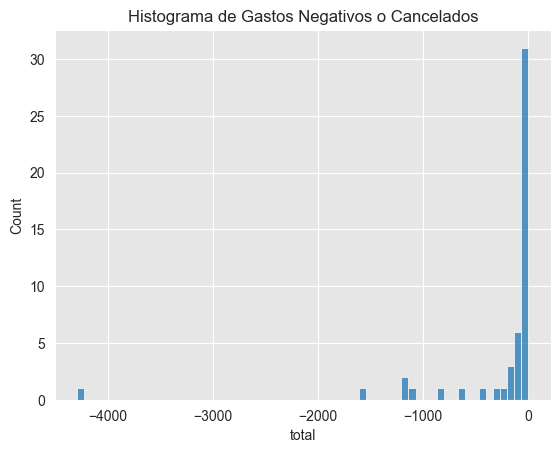

In [80]:
# Configurar el estilo de las gráficas
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Agrupar por usuario y hacer la suma de productos y precio total gastado
gp_1 = df_new.groupby('customer_id').agg({'total':'sum', 'quantity':'sum'})

# Usuarios con gastos negativos o menores a cero
sns.histplot(data=gp_1[gp_1['total']<=0], x='total')
plt.title('Histograma de Gastos Negativos o Cancelados')
plt.show()

**CONCLUSIONES**

Este histograma muestra la cantidad de clientes que presentan gastos en negativo. El gasto negativo se aplica a los clientes que han realizado cancelaciones de sus pedidos, dado que los datos se recopilaron durante un periodo de tiempo específico esos datos se pueden referir a pedidos realizados antes de la fecha de recopilación de estos datos. 

Los clientes que se muestran en su mayoría, pertenecen a gastos en 0, significando que 31 clientes cancelaron todas sus facturas. En comparación a la cantidad de clientes total, es una parte mínima de clientes que se encuentran con gastos nulos o en negativo.

## <a id='toc4_1_'></a>[Productos más comprados](#toc0_)

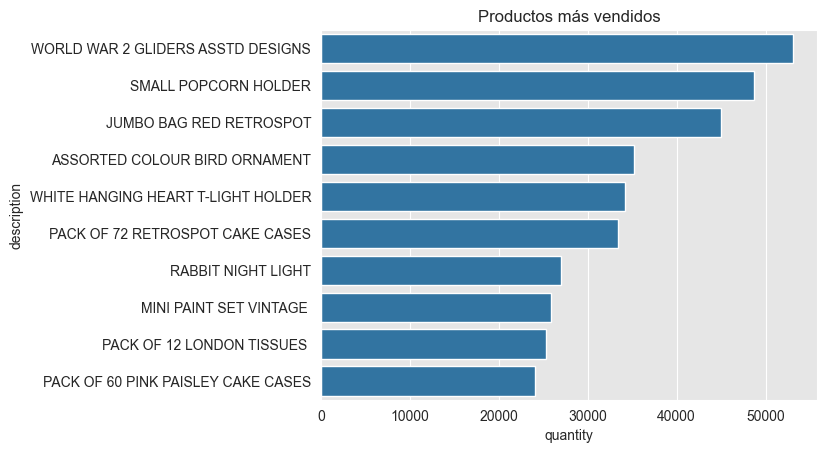

In [81]:
# Agrupar por código de stock y aplicar el primer nombre único por descripción, suma las columnas de cantidad y máximo del precio unitario. Ordenar desc. por cantidad. Sólo los 10 mayores.
gp_code = df_new.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'quantity':'sum', 'unit_price':'max'}).sort_values('quantity', ascending=False).head(10)

# Crear un gráfico de barras
sns.barplot(data=gp_code, x='quantity', y='description')
plt.title('Productos más vendidos')
plt.show()

**CONCLUSIONES**

La gráfica de barras muestra los 10 productos que han sido adquiridos con mayor frecuencia, eliminando las veces que se solicitó y se canceló el pedido. El producto más solicitado es el producto en la parte superior: 'World War 2 Gliders Asstd Designs' con más de 50,000 ventas totales.

También se puede apreciar el producto que menos se frecuenta entre los 10 mejores: 'Pack of 60 Pink Paisley Cake Cases' con poco menos de 25,000 unidades vendidas. Nos deja observar que hay una diferencia aproximada del doble de unidades entre el primero y el décimo más vendidos.

## <a id='toc4_2_'></a>[Precios de los productos más comprados](#toc0_)

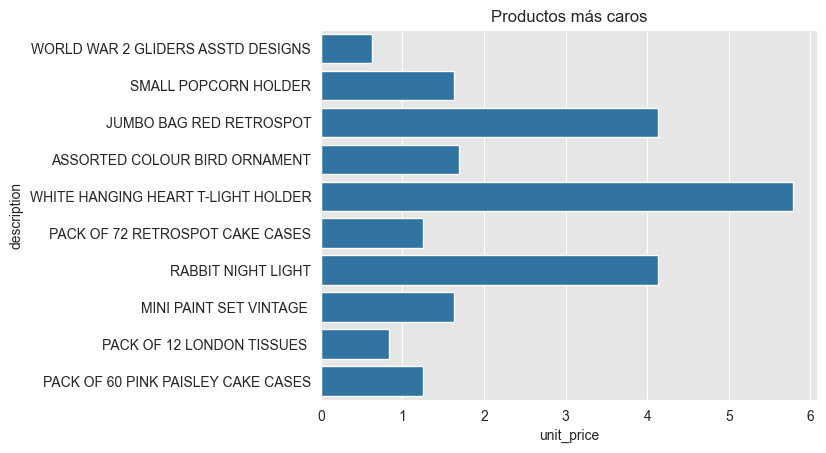

In [82]:
# Crear la visualización utilizando la agrupación anterior
sns.barplot(data=gp_code, x='unit_price', y='description')
plt.title('Productos más caros')
plt.show()

**CONCLUSIONES**

Gracias a la agrupación realizada sobre los productos más vendidos, podemos obtener el precio máximo con el que se venden los productos más solicitados. La grafica de barras ayuda a observar claramente las diferencias entre los precios de los productos.

Se puede ver que el producto que más se vende es el que tiene el menor precio máximo entre los 10 más vendidos con un valor aproximado de $0.6, mientras que el producto en el puesto 5 llega a ser el de mayor precio con casi $6. Mostrando que un menor precio puede ayudar a que los clientes elijan el producto en mayor cantidad.

## <a id='toc4_3_'></a>[Precios de los productos más caros](#toc0_)

In [83]:
# Realizar la agrupación, pero buscando el precio máximo unitario de la lista total de productos
df_new.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'unit_price':'max'}).sort_values('unit_price', ascending=False).head(10)

,description,unit_price
stock_code,,
M,Manual,38970.00
POST,POSTAGE,8142.75
D,Discount,1867.86
DOT,DOTCOM POSTAGE,1599.26
CRUK,CRUK Commission,1100.44
22502,PICNIC BASKET WICKER SMALL,649.50
22655,VINTAGE RED KITCHEN CABINET,295.00
22656,VINTAGE BLUE KITCHEN CABINET,295.00
22826,LOVE SEAT ANTIQUE WHITE METAL,195.00


**CONCLUSIONES**

Complementando con el análisis sobre el precio de los productos más comprados, se realiza la observación numerica de los precios máximos de los productos más caros. En este caso se observa que el producto 'Manual' contiene un precio demasiado elevado, por lo que puede referirse a un servicio de ayuda que se brinde a los clientes, siendo esta la razón de un precio tan elevado. Al igual que con los demás servicios ofrecidos.

Siendo así que en realidad es el producto: 'PICNIC BASKET WICKER SMALL' el que tiene el mayor precio unitario, con un valor de $649.50. De eso se obesrva que existe una gran diferencia entre los precios por servicios y los precios de los productos, siendo que ningún producto rebasa a los precios ofrecidos.

## <a id='toc4_4_'></a>[Región con más productos vendidos](#toc0_)

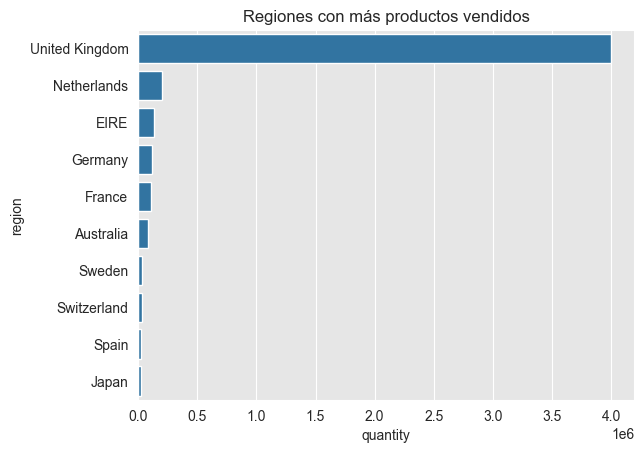

In [84]:
# Agrupar por región
region_df = df_new.groupby('region', as_index=False)

# Agregar funciones de suma a la cantidad y ordenar en forma descendente. Mostrar primeros 10
gp_2 = region_df.agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

# Crear gráfico de barras
sns.barplot(data=gp_2, y='region', x='quantity')
plt.title('Regiones con más productos vendidos')
plt.show()

**CONCLUSIONES**

Con una gran diferencia, la región del Reino Unido sobrepasa a todo el resto de regiones en ventas. Esto quiere decir que en esta región están concentrados la mayor parte de los clientes y puede ser la que mayores ganancias presente.

La cantidad de productos vendidos no necesariamente muestra que tiene mayor número de ventas, pues pueden ser productos de menor valor, sin embargo, puede servirnos de ayuda para sacar conclusiones sobre los clientes por region, dado que ahora sabemos que los clientes de esa región suelen pedir más productos que en el resto de regiones.

## <a id='toc4_5_'></a>[Regiones con clientes únicos](#toc0_)

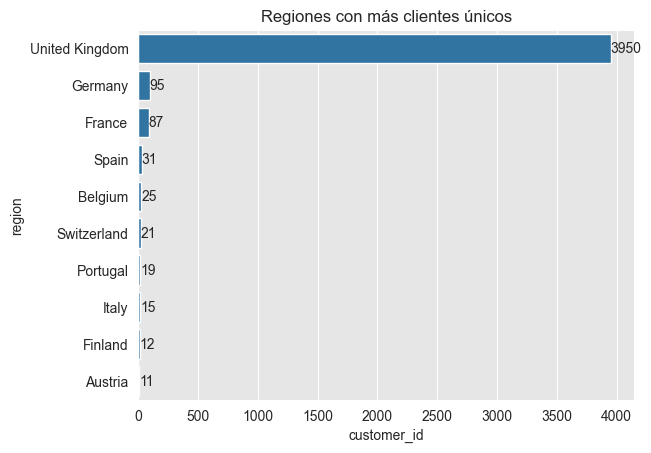

In [85]:
# Agregar por conteo de clientes únicos en cada región, y observar las 10 regiones con mayor cantidad
gp_3 = region_df.agg({'customer_id':pd.Series.nunique}).sort_values('customer_id', ascending=False).head(10)

# Crear grafico de barras y mostrar la cantidad
ax = sns.barplot(data=gp_3, x='customer_id', y='region')
ax.bar_label(ax.containers[0])
plt.title('Regiones con más clientes únicos')
plt.show()

**CONCLUSIONES**

La grafica de barras muestra que la región del Reino Unido tiene la mayor cantidad de usuarios únicos y se observa la gran diferencia que existe en relación al resto de regiones. De aquí podemos concluir que las ventas tienen más alcance en esa región, quizás no se han implementado correctamente en el resto de regiones o no se hayan publicitado las ventas.

De igual manera se observa que el orden en el resto de regiones difiere en cuanto a la cantidad de productos vista en el gráfico anterior, por lo que la cantidad de clientes y de productos que se presentan por región puede afectar a las ganancias que se producen en cada una.

## <a id='toc4_6_'></a>[Ventas por región](#toc0_)

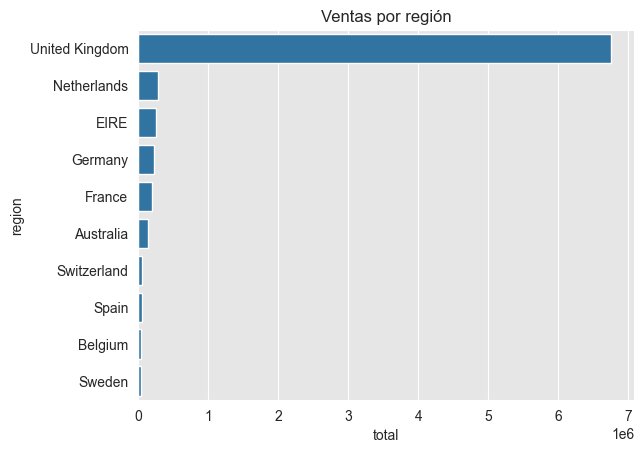

In [86]:
# Agregar la suma del total de ventas por región
sns.barplot(data=region_df.agg({'total':'sum'}).sort_values('total', ascending=False).head(10)  , x='total', y='region')
plt.title('Ventas por región')
plt.show()

**CONCLUSIONES**

Finalmente, observamos las ventas totales por región. Gracias a los análisis anteriores, podríamos haber predicho que la región con mayor número de ventas es la región del Reino Unido, sin embargo, el resto de regiónes no siempre coinciden respecto a la cantidad de productos vendidos o el número de usuarios únicos para cada una.

Los análisis indicarían que los comportamientos de los usuarios por regiones varían en cuanto a cantidad de productos. También se observa la gran ventaja de la región del reino unido sobre el resto de regiones, por lo que sería recomendable aplicar técnicas similares para la promoción sobre las otras regiones y observar si existe un incremento de las ventas y clientes.

## <a id='toc4_7_'></a>[Ventas mensuales](#toc0_)

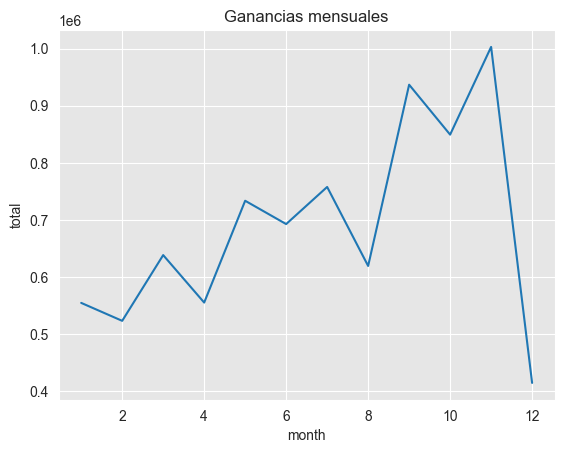

In [87]:
# Agrupar las ventas por mes y agregar suma sobre el total
gp_4 = df_new.groupby('month', as_index=False).agg({'total':'sum'})

# Crear gráfico de líneas
sns.lineplot(data=gp_4, x='month', y='total')
plt.title('Ganancias mensuales')
plt.show()

**CONCLUSIONES**

En este gráfico se puede observar que las ventas van en incremento, aunque con meses de grande pérdidas, aparentemente cada 3 meses. Esto último no se puede asegurar, dado que solo se tienen los datos de un año y debería observarse si ese comportamiento se presenta periodicamente.

Las ventas son más altas durante el mes de Noviembre y más bajas entre los meses de Enero y Diciembre.

## <a id='toc4_8_'></a>[Ventas mensuales por región](#toc0_)

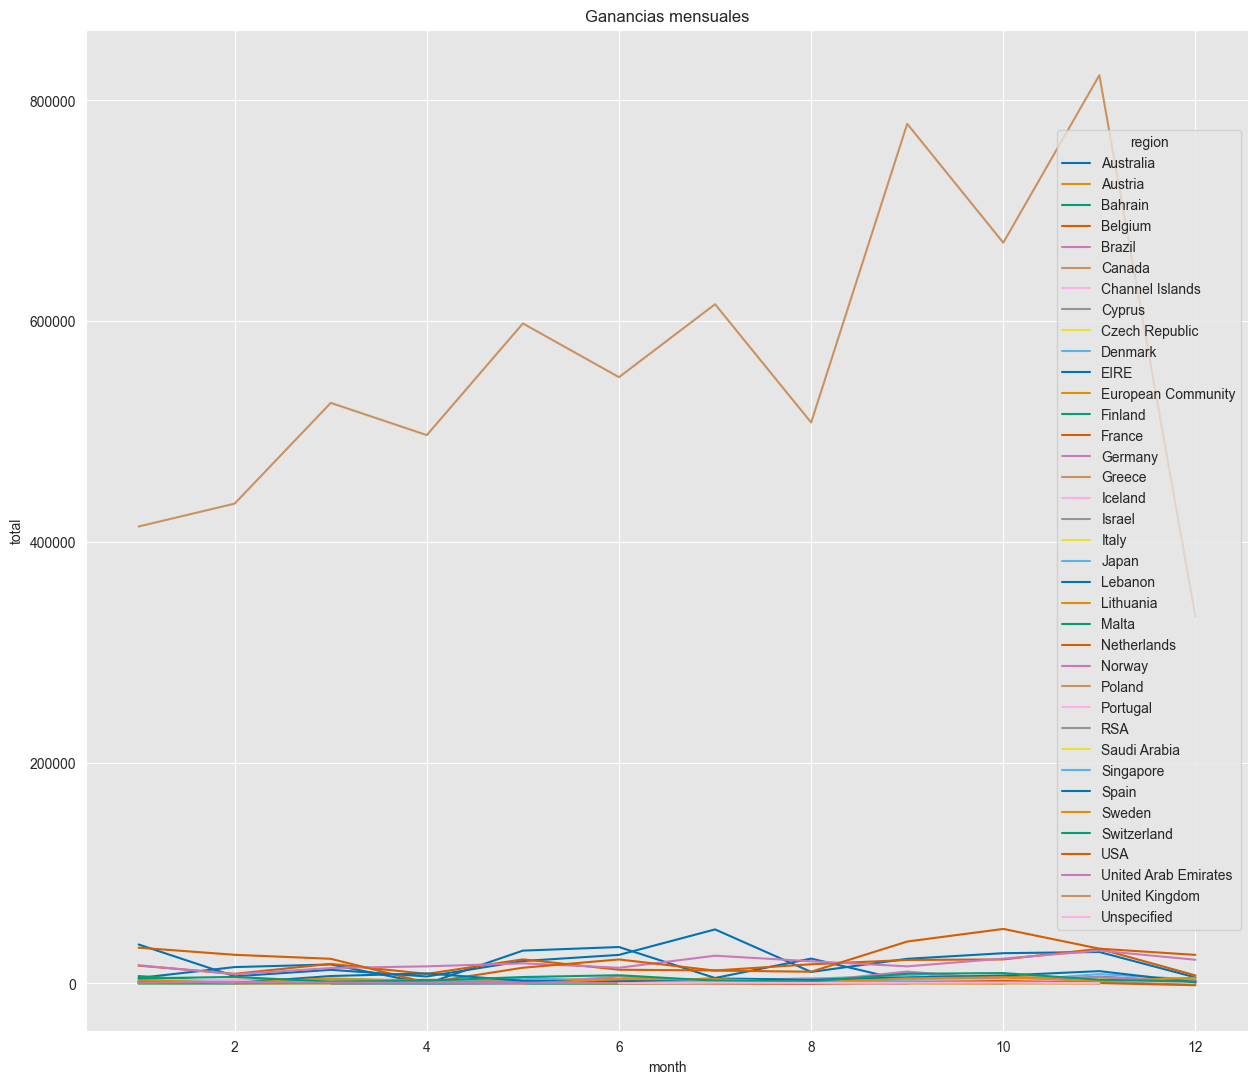

In [88]:
# Agrupar por región y por mes, agregar la suma del total de ventas
gp_5 = df_new.groupby(['region', 'month'], as_index=False).agg({'total':'sum'})

# Crear gráfico de líneas
plt.figure(figsize=(15,13))
sns.lineplot(data=gp_5, x='month', y='total', hue='region', palette='colorblind')
plt.title('Ganancias mensuales')
plt.show()

**CONCLUSIONES**

Gracias a esta gráfica se puede observar que las distintas regiones presentan picos de ventas en diferentes meses del año. Claramente la región del Reino Unido se presenta a un número de ventas mayor que el resto de las regiones, pero de igual manera se puede observar que existen bajas cantidades de ventas en el mes de Abril para la mayoría de las regiones. AL igual que se observan mayor cantidad de ventas en los finales del año. Solamente existen algunas regiones que presentan altas cantidades de ventas en los primeros meses del año.

# <a id='toc5_'></a>[Construcción del modelo](#toc0_)

## <a id='toc5_1_'></a>[Creación de Tabla RFM](#toc0_)

Primero vamos a crear una tabla con los valoresa RFM en donde cada sigla representa:

* Recency: Esta métrica nos dice la diferencia de días entre la diferencia entre la última fecha y la ultima fecha de compra*
 
* Frequency: Es la cantidad de compras que ha realizado el cliente calculada haciendo la suma de todas sus compras
 
* Monetary: Es la cantidad de dinero gastado sumando todas sus compras totales

*nota: para recency necesitamos aumentar en uno nuestra fecha máxima 

In [89]:
# Creación de nuestra última fecha
final_date = max(df_new['invoice_date']+ dt.timedelta(days=1))

In [90]:
# Creación de la tabla de rfm
rfm_df = df_new.groupby(['customer_id', 'region']).agg(
    recency = ('invoice_date', lambda x: (final_date- x.max()).days),
    frecuency = ('invoice_no', 'count'),
    monetary = ('total', 'sum')
)

# Visualización de tabla
rfm_df

,,recency,frecuency,monetary
customer_id,region,,,
12346,United Kingdom,328,2,0.00
12347,Iceland,41,182,4310.00
12348,Finland,77,31,1797.24
12349,Italy,20,73,1757.55
12350,Norway,313,17,334.40
...,...,...,...,...
18280,United Kingdom,161,10,180.60
18281,United Kingdom,5,7,80.82
18282,United Kingdom,94,13,176.60


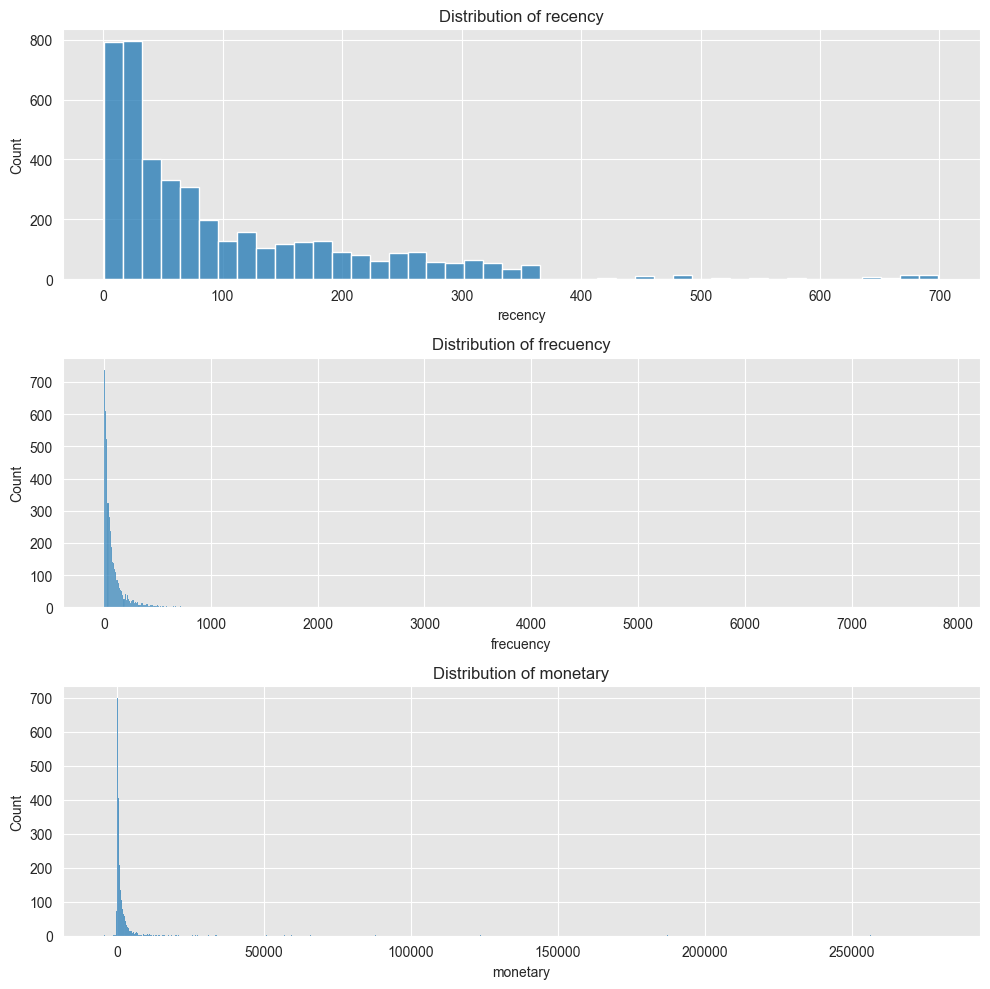

In [91]:
# Distribuciones de RFM
plt.figure(figsize=(10,10))
for i, column in enumerate(rfm_df,1):

    plt.subplot(3,1,i)
    sns.histplot(rfm_df, x=column)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Aqui podemos notar que tenemos altos valores cercanas a cero en nuestras tres columnas, esto nos puede indicar que tenemos varios clientes con compras menores a 100 días,tenemos que la cantidad de compras por cliente es menor a 250 aunque tenemos clientes que han realizado muchísimas compras, y finalmente la mayoría a gastado menos de $500 aproximadamente.

A continuación estandarizaremos los datos debido a que tenemos valores extremos.

In [92]:
# Estandarización de datos
rfm_scaler = StandardScaler()

# Entrenamiento con la tabla
rfm_scaler.fit(rfm_df)

# Transformación de los datos
rfm_escaler_tr = rfm_scaler.transform(rfm_df) # np.log1p añade un uno para que todos los valores sean positivos

# Convertimos el resultado a un dataframe
rfm = pd.DataFrame(rfm_escaler_tr, columns= ['recency', 'frecuency', 'monetary'], index=rfm_df.index)

# Visualizamos datos
rfm.head(10)

,,recency,frecuency,monetary
customer_id,region,,,
12346,United Kingdom,1.977771,-0.391658,-0.230206
12347,Iceland,-0.536243,0.394362,0.294741
12348,Finland,-0.220897,-0.265021,-0.011307
12349,Italy,-0.720196,-0.081617,-0.016141
12350,Norway,1.846376,-0.326156,-0.189477
12352,Norway,-0.247176,0.014452,-0.041979
12353,Bahrain,0.900336,-0.382924,-0.219366
12354,Spain,1.154365,-0.147118,-0.098738
12355,Bahrain,-0.045704,-0.343623,-0.174253


Utilirizaremos el método del codo para determinar el valor óptimo de clusters

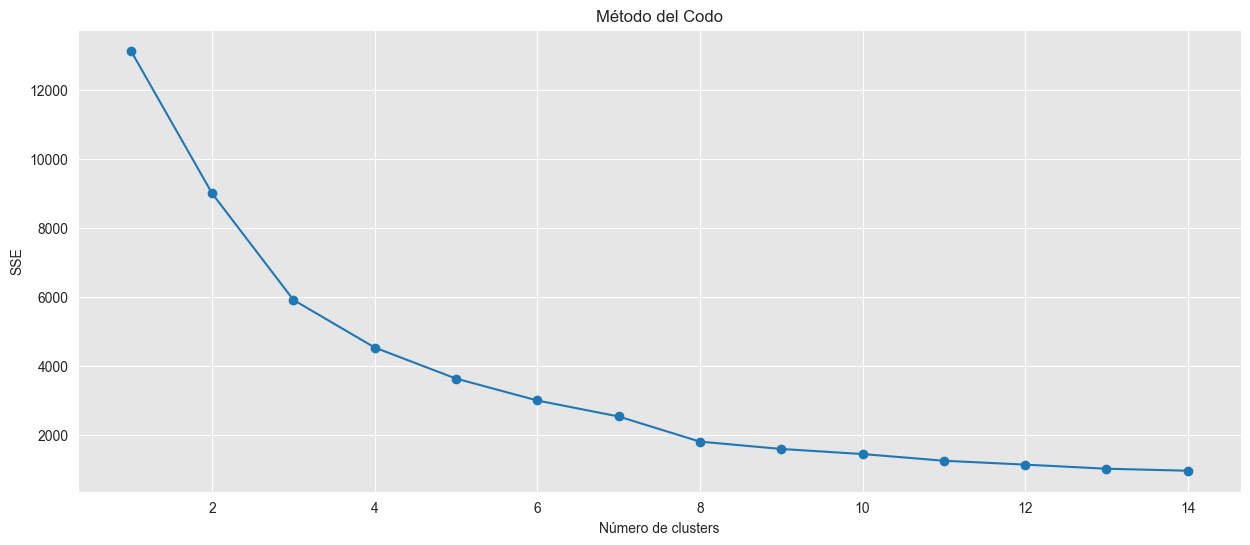

In [93]:
# Realización del método del codo
distortion = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=123456)
    kmeans.fit(rfm)
    distortion.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(15, 6))
plt.plot(range(1, 15),distortion, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

Podemos observar que el método nos dice que nuestro número óptimo está en 4 clusters

In [94]:
# Realización del modelo
kmeans = KMeans(n_clusters=4, random_state=123456, n_init='auto')

# Ajustar el modelo
kmeans.fit(rfm)


KMeans(n_clusters=4, random_state=123456)

In [95]:
# Creamos una nueva columna de categorias
rfm_df["cluster"] = kmeans.labels_

# Convirtiendo el tipo de datos a categorical
rfm_df["cluster"]=rfm_df["cluster"].astype("category")

rfm_df

,,recency,frecuency,monetary,cluster
customer_id,region,,,,
12346,United Kingdom,328,2,0.00,0
12347,Iceland,41,182,4310.00,2
12348,Finland,77,31,1797.24,2
12349,Italy,20,73,1757.55,2
12350,Norway,313,17,334.40,0
...,...,...,...,...,...
18280,United Kingdom,161,10,180.60,0
18281,United Kingdom,5,7,80.82,2
18282,United Kingdom,94,13,176.60,2


En la siguiente tabla mostraremos como se segmentaron nuestros grupos

In [96]:
# definicion de segmentación
segmentation = rfm_df.groupby('cluster').agg(
    recency= ('recency', 'mean'),
    frecuency=('frecuency', 'mean'),
    monetary= ('monetary','mean')
).sort_values(by='recency').reset_index()

# Visualizamos tabla
segmentation.head()


,cluster,recency,frecuency,monetary
0,1,5.000000,5824.250000,64463.562500
1,3,9.000000,1022.833333,174719.183333
2,2,47.792291,104.228510,1990.764054
3,0,264.673933,28.562216,421.927684


En esta tabla podemos definir:
* El grupo etiquetado como 1 los podríamos catalogar como los clientes Platinum ya que tienen un tiempo corto de compra, con mucha compras y un buen gasto.
* El grupo 3 lo podemos etiquetar con los clientes Gold tardan un poquito más en comprar con alta frecuencia y tambien gastando mucho.
* El grupo 2 lo podemos etiquetar como clientes Silver tardan más en comprar, compran menos y gastan mucho menos respecto a los grupos 1 y 3.
* El grupo 0 lo podemos etiquetar como cliente basic son clientes que no han cuativados tantos por los productos que se ofrecen.

Cambiaremos estos valores para una mejor comprensión de las tablas

In [97]:
# Cambio en la tabla rfm_df
cluster_dict = {0: 'basic', 1:'platinum', 2:'silver', 3:'gold'}

# Cambio en la tabla rfm_df
rfm_df['cluster_meaning']=rfm_df['cluster'].replace(cluster_dict)

# Viualizamos cambios
rfm_df.head()


,,recency,frecuency,monetary,cluster,cluster_meaning
customer_id,region,,,,,
12346,United Kingdom,328,2,0.00,0,basic
12347,Iceland,41,182,4310.00,2,silver
12348,Finland,77,31,1797.24,2,silver
12349,Italy,20,73,1757.55,2,silver
12350,Norway,313,17,334.40,0,basic


In [98]:
# Cambio en la tabla segmentation
segmentation['cluster_meaning']=segmentation['cluster'].replace(cluster_dict)

# Viualizamos cambios
segmentation

,cluster,recency,frecuency,monetary,cluster_meaning
0,1,5.000000,5824.250000,64463.562500,platinum
1,3,9.000000,1022.833333,174719.183333,gold
2,2,47.792291,104.228510,1990.764054,silver
3,0,264.673933,28.562216,421.927684,basic


# <a id='toc6_'></a>[Conclusión Final](#toc0_)

En estre trabajo nos encontramos con una gran cantidad de valores nulos sobre todo en la columna de `customer_id`, los cuales al no poder imputarlos y estos afectar al resultado de la segmentación se decidieron eliminarlos esto representó una perdida de poco más de 25%, se corregieron algunas columnas con los tipos de datos inorrectos y se creo una nueva columna llamada `total` que nos ayudaron en los análisis posteriores.

**Amigos de eda por favor pueden poner un resumen de sus observaciones aquí?**

Para nuestro modelo construimos una tabla con valores de recency, frecuency y monetary, se le aplicó estandarización a los datos y se utilizó el modelo de Kmeans para formar 4 grupos en donde los definimos como "Platinum, Gold, Silver, Basic" ordenados de mejor a peor. 

Recomendaciones
Al estar catalogados se puede realizar diversas acciones como por ejemplo:
* Creación de un sistemas de puntos para alcanzar distintos niveles en donde vayas desbloqueando descuentos exclusivos, envíos gratis etc.
* Creación de campañas  para mantener el interes de los niveles platinum y gold.
* Creación de campañas para incentivar más los clientes de nivel silver, como recordatorios de productos vistos con la aplicación de algún descuento.
* Creación de campañas para cautivar e incentivar más el nivel basic como descuentos muy grandes en la primera compra, una prueba de alguna membresía entre otras.

